In [3]:
import numpy as np
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
perch_length = [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]
perch_weight = [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]

70
56
14


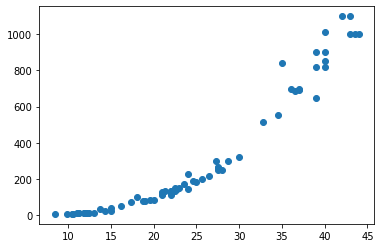

In [12]:
length = smelt_length + perch_length
weight = smelt_weight + perch_weight
print(len(fish_weight))
print(len(perch_weight))
print(len(smelt_weight))
import matplotlib.pyplot as plt
plt.scatter(fish_length, fish_weight)
plt.show()

In [14]:
fish_data = [[l,w] for l, w in zip(length, weight)]
target_data = [0]*14 + [1]*56

In [16]:
from sklearn.neighbors import KNeighborsClassifier as knc
knn = knc()
knn.fit(fish_data, target_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
knn.score(fish_data, target_data)

0.9714285714285714

In [20]:
knn.predict([[35,500]])

array([1])

In [27]:
from sklearn.model_selection import train_test_split as tts
train_input, test_input, train_target, test_target = tts\
(fish_data, target_data)

In [28]:
knn.fit(train_input, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
knn.score(test_input, test_target)

1.0

In [30]:
mean = np.mean(train_input, axis =0)
std = np.std(train_input, axis = 0) 
train_scaled = (train_input - mean) / std

0.9444444444444444


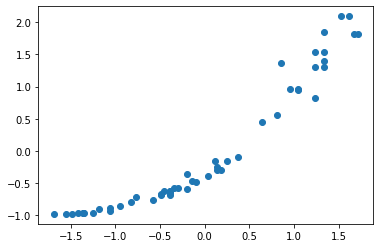

In [35]:
knn.fit(train_scaled, train_target)
print(knn.score((test_input - mean) / std, test_target))
plt.scatter(train_scaled[:,0], train_scaled[:,1])

In [38]:
from sklearn.neighbors import KNeighborsRegressor as KNR
knr = KNR()

In [43]:
x = np.arange(5,45).reshape(-1,1)
for n in range(1,10):
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)
  plt.plot(x,prediction)
  plt.show()
  print(knr.score(train_input, train_target))
  

ValueError: ignored